# Investigating unadjusted p-values from 0ppm vs 1500ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ May 01, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the fold change in normalized expression between 1500ppm and 0ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/0ppm_vs_1500ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/0ppm_vs_1500ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/0ppm_vs_1500ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

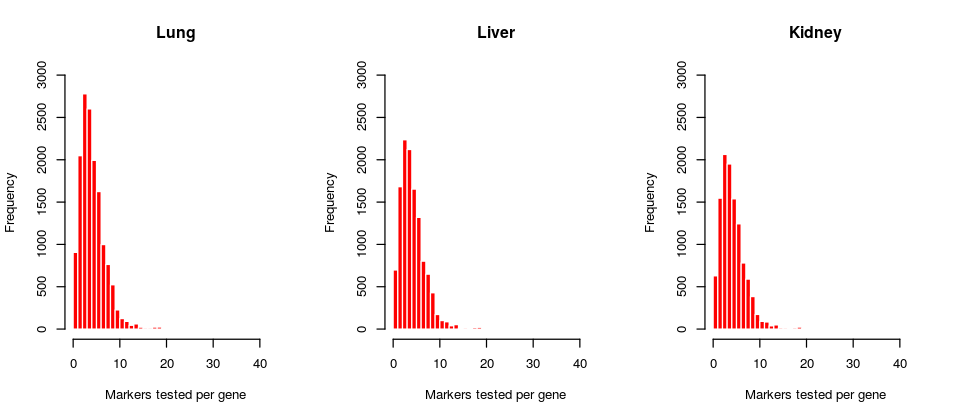

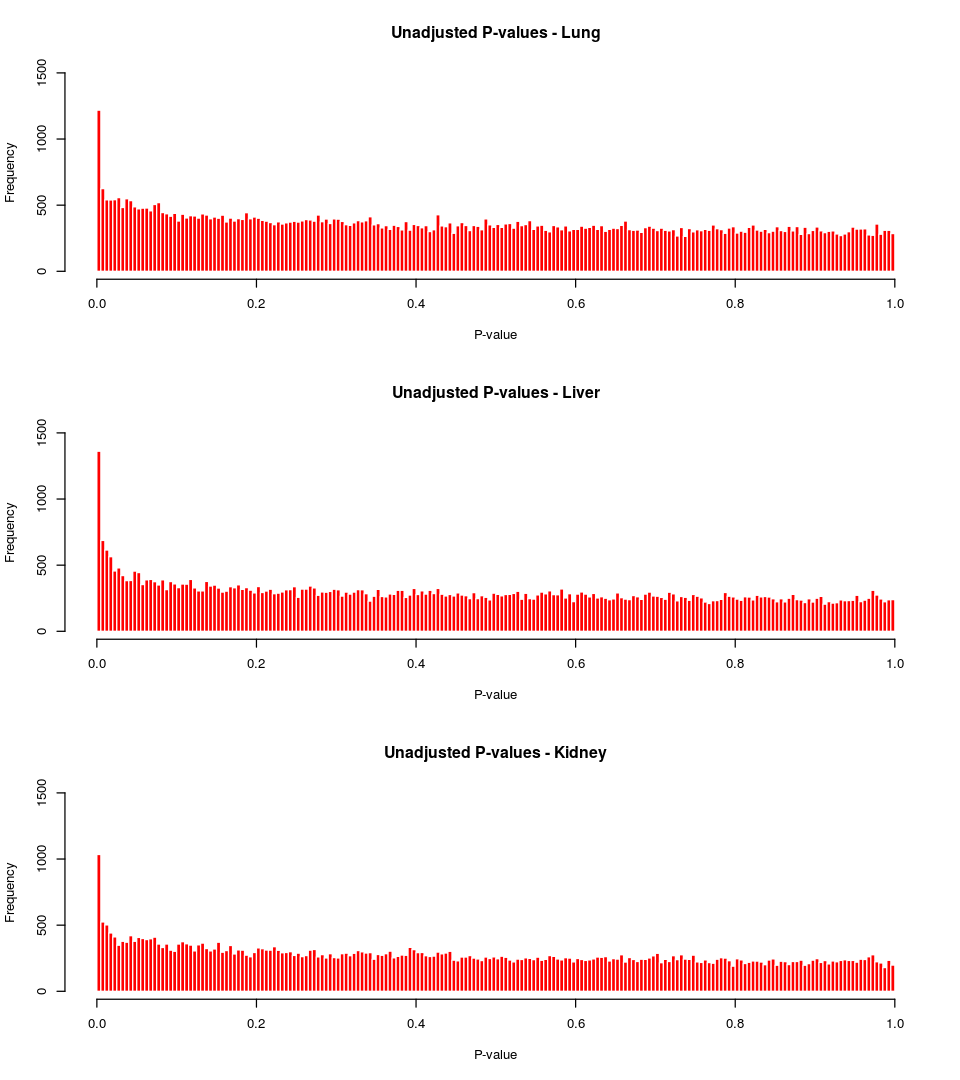

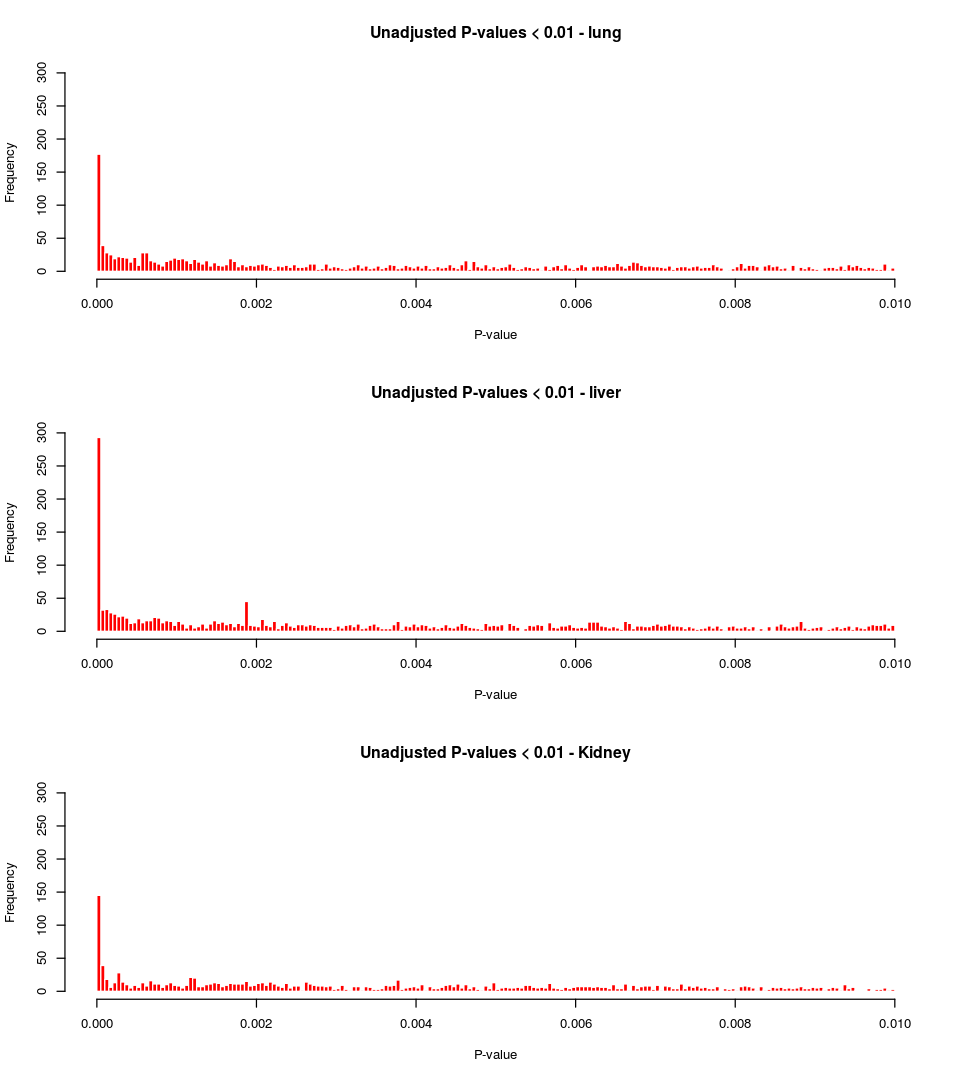

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [5]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/0ppm_vs_1500ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/0ppm_vs_1500ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/0ppm_vs_1500ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 2 --> row.names NOT used”Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 2 --> row.names NOT used”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to

In [6]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene      Marker                         P-value             
1   Cyp2j6    UNC7778493.UNC7800092          1.29563937561479e-26
2   Snhg7     UNC2765102.UNC2767477          6.05224887197655e-16
3   Snhg7     UNC2761572.JAX00092339         6.05227095752652e-16
4   Snhg7     JAX00485655.UNC2769505         6.08156742535891e-16
5   Styxl1    UNC10244622.UNC10246662        9.64040242598408e-16
6   Obp2a     UNC2746803.UNC2747334          2.8918561068111e-14 
7   Cyp2j6    UNC7800165.UNC7802608          3.72460675319702e-13
8   Klk1b3    UNC12683876.UNC12706160        3.82059910647649e-13
9   Tmprss7   UNC26731136.UNC26731473        1.57165993003279e-12
10  Tmprss7   UNC26731511.UNC26731511        1.59714778089359e-12
11  Tmprss7   UNC26731523.UNC26731564        1.63675706223521e-12
12  Tmprss7   UNC26731610.JAX00419693        1.95875905271009e-12
13  Ifi44l    UNC6556592.UNC6558996          2.38745355721089e-12
14  Klk1b3    UNC12723666.UNC12729352        1.09502641614194e-11
15  Klk1b3    UNC12722783.UNC12723405        1.18058618245198e-11
16  Klk1b3    UNC12706670.JAX00637356        1.60050019478392e-11
17  Ifi44l    JAX00114731.UNC6556071         2.23387090264831e-11
18  Psmd12    UNC20315504.backupUNC110400857 1.70880638029648e-09
19  Ctla2a    JAX00359713.UNC22734330        2.77583900342746e-09
20  Skint3    UNC7994796.JAX00562456         3.4421278260801e-09 
21  Pou1f1    JAX00209502.UNC27006629        3.85270917310684e-09
22  Oas1c     JAX00134896.UNC10027093        8.34701455209671e-09
23  Oas1c     backupUNC050199022.UNC10027338 9.21875986049823e-09
24  Skint3    UNC7962711.UNC7992952          9.55203807502295e-09
25  Oas1c     UNC10027431.UNC050201332       1.32141264063626e-08
26  Ifi44l    UNC6533075.UNC6535625          1.98564213964824e-08
27  Scgb2b1   UNC12573980.UNC12575906        2.89249531035725e-08
28  Scgb2b1   JAX00149774.UNC12572046        2.89250221322523e-08
29  Scgb2b1   UNC12572462.UNC12573732        2.92203163614741e-08
30  Ifi44l    UNC6535699.UNC6536460          3.61844162592575e-08
⋮   ⋮         ⋮                              ⋮                   
71  Snrpa1    UNC13035293.UNC13035592        2.24799370522782e-06
72  Snrpa1    JAX00642081.UNC13037715        2.3484491334373e-06 
73  Grin2b    UNC12177614.UNC12178674        2.4035562916913e-06 
74  Grin2b    UNC12179309.UNC12179309        2.42446204300606e-06
75  Grin2b    UNC061570824.UNC12188013       2.47529569813253e-06
76  Cbr3      UNC27425389.JAX00428648        2.52758409638066e-06
77  Fzd9      UNC10221075.UNC10233860        2.71278023734112e-06
78  Hint1     UNC19663542.UNC19663932        2.71830829299505e-06
79  Cbr3      UNC27424993.UNC27425305        2.84737968008626e-06
80  Ly6f      UNC25896223.UNC25904367        4.16702523063998e-06
81  Serpinb6c UNC22378305.JAX00354323        4.58098456052178e-06
82  Serpinb6c backupJAX00354324.JAX00354524  4.67378403019707e-06
83  Fzd9      UNC10234156.UNC10235152        4.96126092991455e-06
84  Serpinb6c UNC22370249.UNC22378085        5.0123016442876e-06 
85  Serpinb6c UNC22394212.UNC22409068        5.26278107537013e-06
86  Tff3      UNC27771405.JAX00436049        5.56145949919403e-06
87  Cbr3      UNC27408782.UNC27418159        5.6519417181379e-06 
88  Cyp2b23   UNC12521588.UNC12531236        6.90740101875815e-06
89  Gphb5     JAX00338268.UNC21415183        7.02355593956433e-06
90  Tff3      UNC170640988.JAX00075037       7.27857346455729e-06
91  Lncbate1  UNC15469522.UNC15469745        7.37435707271791e-06
92  Cyp2b23   UNC12514662.JAX00149482        7.41970073787514e-06
93  Prkab1    UNC9978802.UNC9998500          7.44139199255739e-06
94  Lncbate1  JAX00679730.UNC15469362        7.77648081516672e-06
95  Cbr3      UNC27408716.UNC27408716        8.26670052985947e-06
96  Cyp2b23   UNC12521377.UNC12521377        8.61892678013584e-06
97  Shh       UNC8871723.UNC8892642          8.87510008165738e-06
98  Lncbate1  UNC15470016.UNC080433052       9.00597201839828e-06
99  Shh       UNC8865718.UNC050326639       

Liver


Gene    Marker                            P-value             
1   Rad51   UNC3842618.UNC3869677             2.36820533402192e-29
2   Rad51   UNC3827172.UNC020151798           2.54277811554667e-29
3   Rad51   UNC3837886.UNC3842200             2.86312839015853e-29
4   Ttc8    UNC21733334.UNC21751906           5.9112805793099e-22 
5   Ttc8    UNC21732309.JAX00343047           6.4722047352067e-22 
6   Ifi44l  UNC6556592.UNC6558996             6.92713367805621e-19
7   Mir350  UNC2252898.UNC2260665             2.63100674986038e-18
8   Ifi44l  JAX00114731.UNC6556071            3.29927779639601e-18
9   Pmepa1  UNC4531549.UNC4536733             6.12885919915213e-15
10  Pmepa1  UNC4536843.UNC4537497             9.86711896118348e-15
11  Pmepa1  UNC4540460.UNC4545629             1.00590585547488e-14
12  Pmepa1  UNC4537733.UNC4540317             1.0535046467364e-14 
13  Ubash3a UNC27753023.UNC27767093           2.4844714666412e-13 
14  Ppard   UNC27722618.UNC27722769           3.87302357358991e-13
15  Ppard   UNC27723571.UNC27725690           4.01220375155355e-13
16  Ppard   UNC27722978.UNC27723391           4.51104442362944e-13
17  Ppard   UNC27715265.JAX00434785           5.04688058683265e-13
18  Lrrn4cl UNC29865283.UNC29865283           2.35817044388678e-12
19  Lrrn4cl UNC29856661.UNC29864970           2.36195692745677e-12
20  Lrrn4cl UNC29865458.UNC29866758           2.37851641618884e-12
21  Lrrn4cl JAX00469933.JAX00469941           2.4028966318144e-12 
22  Lrrn4cl JAX00469943.JAX00469945           2.41551385323577e-12
23  Lrrn4cl UNC29867469.UNC29867469           2.42275182292314e-12
24  Lrrn4cl JAX00469956.UNC29869053           2.43646005729312e-12
25  Lrrn4cl UNC29869217.UNC29869217           2.44912812513359e-12
26  Lrrn4cl UNC29869312.UNC29869312           2.45311732748415e-12
27  Lrrn4cl UNC29869483.UNC29869587           2.45888517732754e-12
28  Lrrn4cl UNC29869670.UNC29869670           2.46439296580083e-12
29  Lrrn4cl UNC29869762.UNC29869981           2.47133880420235e-12
30  Lrrn4cl UNC29870082.UNC29870082           2.47784267270776e-12
⋮   ⋮       ⋮                                 ⋮                   
73  Mrgpra4 UNC12754049.UNC12772520           3.8736166127945e-09 
74  Mrgpra4 backuprs31415664.backuprs31583247 4.13153701783772e-09
75  Susd3   UNC22553195.UNC22578692           5.04564975970258e-09
76  Mrgpra4 UNC12753163.UNC12753163           8.61099789755625e-09
77  Fxyd5   UNC12572462.UNC12573732           9.19526710382432e-09
78  Ren1    UNC1695463.UNC1706873             9.79649583809252e-09
79  Ifi44l  UNC6533075.UNC6535625             9.94073164892729e-09
80  Ren1    UNC1685599.backupUNC010608551     1.01704996288256e-08
81  Gm12260 UNC19693397.JAX00312408           2.04200565573013e-08
82  Erc2    JAX00375849.JAX00375849           2.82304339101455e-08
83  Erc2    UNC23747128.UNC23749945           2.84033297629944e-08
84  Erc2    UNC23752456.JAX00376057           3.2123257508428e-08 
85  Gm12260 UNC19722711.UNC19725928           3.83931672105171e-08
86  Zfp81   UNC27780949.UNC27786598           4.11029238800795e-08
87  Gm12260 JAX00312461.UNC19726300           4.24081090945958e-08
88  Zfand2a UNC10291007.UNC10306321           4.70873062712443e-08
89  Mir3058 UNC18494429.UNC18499439           4.76616361909994e-08
90  Gm12260 UNC19726557.UNC19736497           5.00218551003736e-08
91  Pir     UNC31547541.UNC31547541           5.70857516875028e-08
92  Prss1   JAX00607772.UNC10940063           6.07787176076664e-08
93  Prss1   UNC10942121.UNC10942121           6.07788594421966e-08
94  Prss1   UNC060953020.UNC10951624          6.07788594421966e-08
95  Prss1   UNC10942121.UNC10942121           6.07788594421966e-08
96  Prss1   UNC060953020.UNC10951624          6.07788594421966e-08
97  Prss1   UNC10940788.UNC10940788           6.07788594421972e-08
98  Prss1   UNC10952030.UNC10962543           6.07788594421974e-08
99  Shf     UNC3870640.JAX00502183            7.48059448705245e-08
100 Shf     UNC020174288.UNC020174288         7.591

Kidney


Gene          Marker                       P-value             
1   Vps37c        UNC29879331.UNC29879331      1.61417251325055e-20
2   Cd5           UNC29883391.UNC29886490      1.62823358848072e-16
3   Cd5           UNC29882454.JAX00470266      1.71712839304298e-16
4   Cd5           UNC29882074.UNC29882074      1.72875553161376e-16
5   Cd5           JAX00086821.JAX00470226      1.7443842382511e-16 
6   Cd5           JAX00086820.JAX00086820      1.76015412099479e-16
7   Cd5           JAX00470213.UNC29881093      1.77207286389654e-16
8   Cd5           UNC29880732.JAX00470212      1.78808395086874e-16
9   Cd5           UNC29880316.UNC29880316      1.80018041684654e-16
10  Cd5           JAX00470180.UNC190659558     4.61642334564572e-16
11  Edf1          JAX00485655.UNC2769505       7.7712863577374e-16 
12  Edf1          UNC2761572.JAX00092339       7.77649291627889e-16
13  Edf1          UNC2765102.UNC2767477        7.77650513997217e-16
14  Arid5b        JAX00291370.UNC18153536      3.2632408611089e-15 
15  Arid5b        UNC18153616.JAX00291896      4.07015469643603e-14
16  St8sia6       UNC2594189.UNC2596414        7.20993702343869e-13
17  2310034O05Rik UNC9778806.UNC9792580        9.01365859868923e-11
18  2310034O05Rik UNC9770117.JAX00589809       9.50531753131455e-11
19  2310034O05Rik UNC9768856.UNC9769129        9.71202142698637e-11
20  2310034O05Rik JAX00589558.UNC9767715       1.05204499686227e-10
21  Cyp2b13       UNC12521588.UNC12531236      1.42357964585562e-10
22  Rdh13         UNC12380978.UNC12380978      1.69586953521183e-10
23  Vps37c        JAX00470180.UNC190659558     1.89890849327036e-10
24  Vps37c        UNC29883391.UNC29886490      2.22541524999641e-10
25  Vps37c        UNC29882454.JAX00470266      2.62820833895313e-10
26  Vps37c        UNC29882074.UNC29882074      2.63654135707071e-10
27  Vps37c        JAX00086821.JAX00470226      2.64772008963794e-10
28  Vps37c        JAX00086820.JAX00086820      2.65897688187626e-10
29  Vps37c        JAX00470213.UNC29881093      2.66747080304167e-10
30  Vps37c        UNC29880732.JAX00470212      2.67886469237091e-10
⋮   ⋮             ⋮                            ⋮                   
71  Mir7002       JAX00098860.JAX00500218      2.49979119324632e-06
72  Sparc         JAX00311744.UNC19687858      2.50429994990701e-06
73  Mir7002       UNC3777847.JAX00098858       2.56630674446223e-06
74  Mir532        JAX00708653.UNC30613748      2.84499646615202e-06
75  Mir532        UNC30623235.UNC30623235      2.84732088209747e-06
76  Mir532        B6_X_007468090_S.JAX00708820 2.84750537677164e-06
77  Mir532        UNC30623418.UNC30623418      2.84769306107139e-06
78  Mir532        UNC30620787.UNC30622947      2.84830571125742e-06
79  Mir532        UNC30613972.UNC30618375      2.84852959542311e-06
80  Mir532        UNC30619220.JAX00176788      3.73794820529134e-06
81  Znrf1         UNC15506736.UNC15513232      5.35811153729561e-06
82  Hrk           JAX00593938.JAX00593938      5.87000503006416e-06
83  Znrf1         UNC15513438.UNC15520687      6.0397159719253e-06 
84  Slco1a4       UNC12262408.UNC12267926      6.58144879001154e-06
85  Slco1a4       UNC12256540.UNC12261951      6.90662635234891e-06
86  Ppil1         UNC27731210.UNC27741547      7.89257340347933e-06
87  Slco1a4       UNC12254567.UNC12256117      1.09272719792397e-05
88  Pgm1          UNC9252175.UNC9339990        1.10265229065625e-05
89  Hrk           JAX00593949.UNC9998780       1.12087805102718e-05
90  Slco1a4       JAX00629204.UNC12275049      1.14506612228979e-05
91  Rab39         JAX00171258.UNC16382565      1.16092816457506e-05
92  Hrk           UNC10005933.UNC10014196      1.22268676512547e-05
93  Zfp213        UNC170299097.UNC27694074     1.22782091471201e-05
94  Trim12a       UNC13494279.UNC13543143      1.27450961318288e-05
95  Rab39         UNC16392681.UNC16398934      1.29845314342562e-05
96  Rab39         UNC16383514.UNC16391640      1.36152331744828e-05
97  Mab21l3       UNC5856401.JAX00532122       1.37755241394